# Praca domowa 6

## Zadanie 1


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("house_data.csv")

1. Jaka jest średnia cena nieruchomości położonych nad wodą, których jakoś wykończenia jest równa lub większa od mediany jakości wykończenia?


In [11]:
df1 = df.loc[df.waterfront == 1]
med = df1.grade.median()
df1.loc[df1.grade >= med].price.mean()

2302236.3095238097

Odp: 2302236.31 $

2. Czy nieruchomości o 2 piętrach mają większą (w oparciu o wartości mediany) liczbę łazienek niż nieruchomości o 3 piętrach?


In [14]:
df.loc[df.floors == 2].bathrooms.median() > df.loc[df.floors == 3].bathrooms.median()

False

Odp: Nie

3. Jak wygląda wartość kwartyla 0.25 oraz 0.75 jakości wykończenia nieruchomości położonych na północy biorąc pod uwagę czy ma ona widok na wodę czy nie ma?

In [26]:
which_north = ( df.lat.max() + df.lat.min() )/2

df.loc[df.lat > which_north].groupby("waterfront").grade.quantile(q=[0.25,0.75])

waterfront      
0           0.25     7.0
            0.75     8.0
1           0.25     8.0
            0.75    10.0
Name: grade, dtype: float64

Odp: kwantyl 0.25:  bez widoku 7.0,
                    z widokiem 8.0
                    
Odp: kwantyl 0.75:  bez widoku 8.0,
                    z widokiem 10.0

4. Pod którym kodem pocztowy jest położonych najwięcej nieruchomości i jaki jest rozstęp miedzykwartylowy dla ceny nieruchomości położonych pod tym adresem?

In [92]:
moda = df.zipcode.mode()[0]

IQR = df.loc[df.zipcode == moda].price.quantile(0.75) - df.loc[df.zipcode == moda].price.quantile(0.25)
moda, IQR

(98103, 262875.0)

Odp: Najwięcej pod kodem 98103, a rozstęp międzykwartylowy wynosi 262875.0

5. Ile procent nieruchomości ma wyższą średnią powierzchnię 15 najbliższych sąsiadów względem swojej powierzchni?

In [74]:
# LUB df.loc[df.sqft_lot15 > df.sqft_lot].shape[0]/df.shape[0]*100  WTEDY WYNIK 39.513255910794435 (39.51%)
df.loc[df.sqft_living15 > df.sqft_living].shape[0]/df.shape[0]*100

42.594734650441865

Odp: 42.59% - jeśli patrzymy na powierzchnię  mieszkaniowa wewnątrz domu     (LUB 39.51% jeśli patrzymy na powierzchnia całej działki - zmienna sqft_lot)

 6. O ile procent więcej jest nieruchomości leżcych na północy zachód niż  nieruchomości leżących na południowy wschód?

In [167]:
which_west = ( df.long.max() + df.long.min() )/2

nw_count = df.loc[(df.lat > which_north) & (df.long < which_west)].shape[0]

se_count = df.loc[(df.lat < which_north) & (df.long > which_west)].shape[0]

(nw_count - se_count)/se_count*100

18343.529411764706

Odp: 18343.53% (liczone względem nieruchomości na południowym wschodzie)

# Zadanie 2

Dla wybranej zmiennej ze zbioru danych z Zadania 1 narysuj:

a) rozkład zmiennej jakościowej

b) rozkład zmiennej ilościowej

c) rozkład dwóch zmiennych (dowolna kombinacja jakościowej i ilościowej)

a)

Text(0.5, 1.0, 'GRADES')

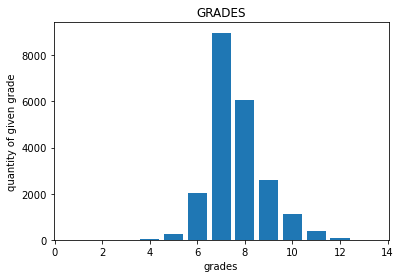

In [165]:
# pomocnicza ramka danych
tmp = df.filter(items=['id', 'grade']).groupby("grade").count()

# wykres
plt.bar(list(tmp.index), tmp.id.tolist())
plt.xlabel('grades')
plt.ylabel('quantity of given grade')
plt.title("GRADES")

b)

Text(0.5, 1.0, 'Real estates in years')

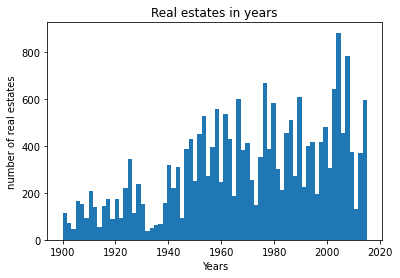

In [162]:
# liczba kubełków
number_of_bins = 70

# wykres
plt.hist(df.yr_built, number_of_bins)
plt.xlabel('Years')
plt.ylabel('number of real estates')
plt.title("Real estates in years")

c)

Text(0.5, 1.0, 'Mean Values of prices for diffrent grades')

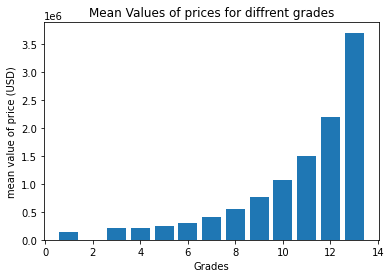

In [16]:
# dane pomocnicze
tmp2 = df.filter(items=['price', 'grade']).groupby("grade").mean()


# wykres
plt.bar(list(tmp2.index), tmp2.price.tolist())
plt.xlabel('Grades')
plt.ylabel('mean value of price (USD)')
plt.title("Mean Values of prices for diffrent grades")

A poniżej wykres dystrubucji ceny dla różnych wartości Graded

Text(0.5, 1.0, 'Price Distribution for diffrent grades')

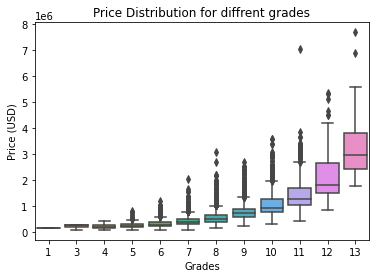

In [15]:
# dane pomocnicze
tmp3 = df.filter(items=['price', 'grade'])

import seaborn as sns
# wykres
sns.boxplot(data = df, x = df.grade, y = df.price)
plt.xlabel('Grades')
plt.ylabel('Price (USD)')
plt.title("Price Distribution for diffrent grades")